ZOMATO DELIVERY PREDICTION - PHASE 2: FEATURE ENGINEERING & EDA
Loading prepared data from Phase 1...
Dataset shape: (11, 56)
Columns: ['ID', 'Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings', 'Restaurant_latitude', 'Restaurant_longitude', 'Delivery_location_latitude', 'Delivery_location_longitude', 'Order_Date', 'Time_Orderd', 'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density', 'Vehicle_condition', 'Type_of_order']...

STEP 1: CREATING ADVANCED FEATURES

Creating speed and efficiency features...
Creating interaction features...
Creating temporal advanced features...
Creating spatial features...
Creating driver performance features...
Creating order complexity features...

Created 29 new advanced features
Total features now: 85

Top 10 new features by correlation with target:
  Travel_Time_Min                     : +0.9571
  Prep_Efficiency                     : -0.7444
  Order_Complexity                    : -0.7104
  Distance_Traffic_Interaction   

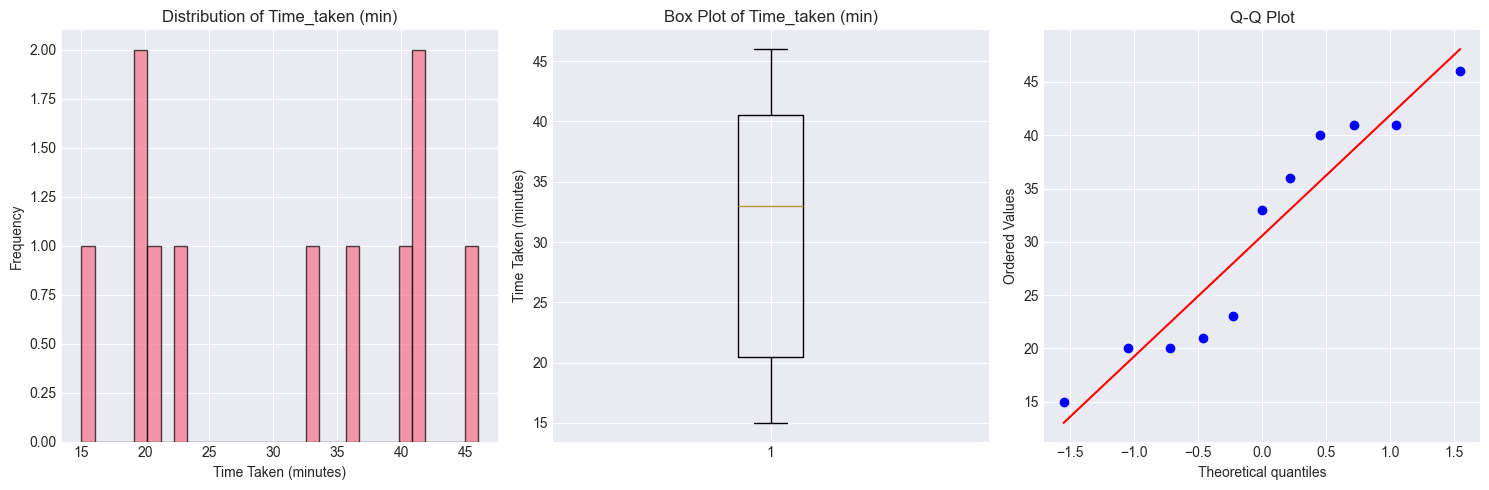


Target Variable Statistics:
  Mean: 30.55 minutes
  Median: 33.00 minutes
  Std Dev: 10.93 minutes
  Min: 15.00 minutes
  Max: 46.00 minutes
  Skewness: -0.038
  Kurtosis: -1.797

2. Correlation Analysis
----------------------------------------


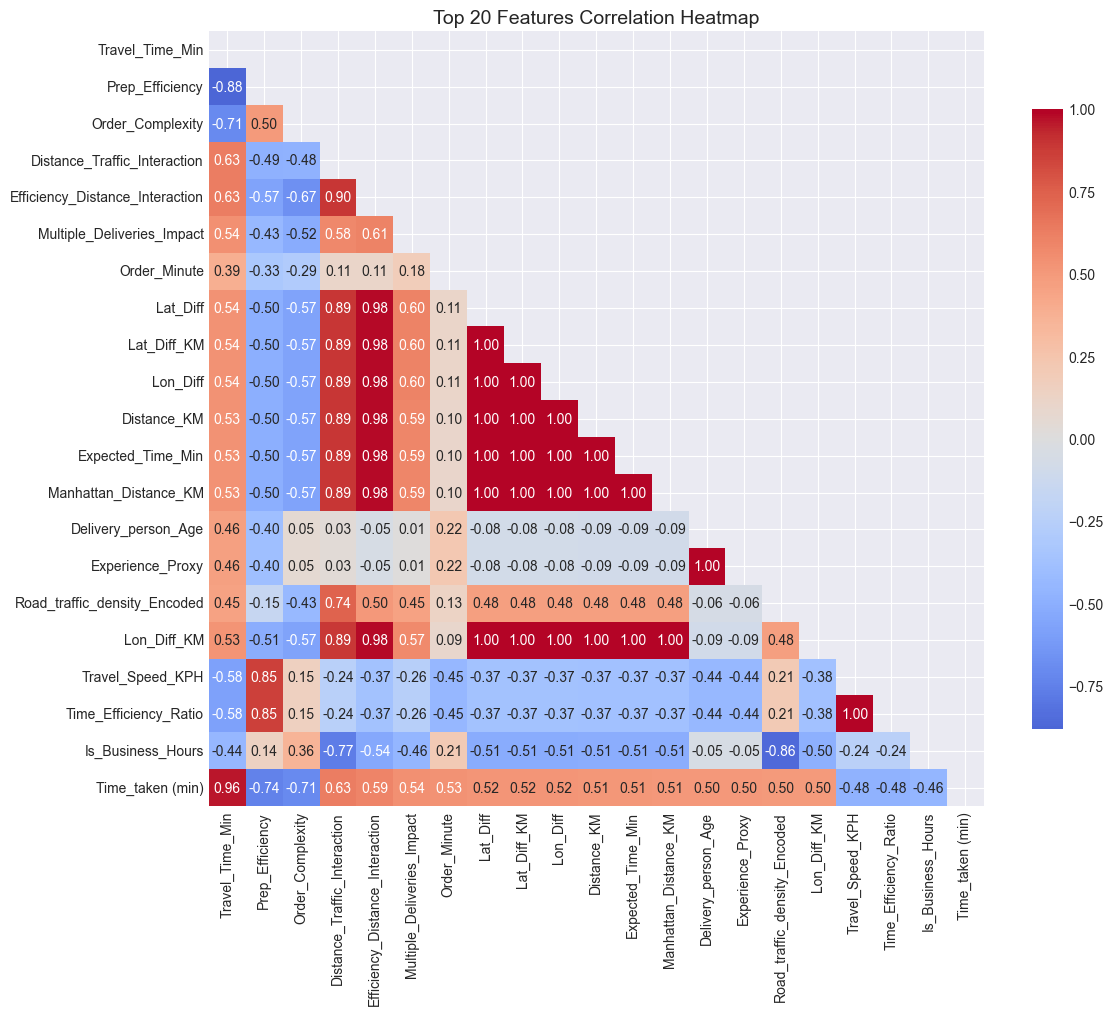


Top 10 features correlated with target:
  Travel_Time_Min                     : +0.9571
  Prep_Efficiency                     : -0.7444
  Order_Complexity                    : -0.7104
  Distance_Traffic_Interaction        : +0.6269
  Efficiency_Distance_Interaction     : +0.5946
  Multiple_Deliveries_Impact          : +0.5415
  Order_Minute                        : +0.5326
  Lat_Diff                            : +0.5176
  Lat_Diff_KM                         : +0.5176
  Lon_Diff                            : +0.5176

3. Distance vs Delivery Time Analysis
----------------------------------------


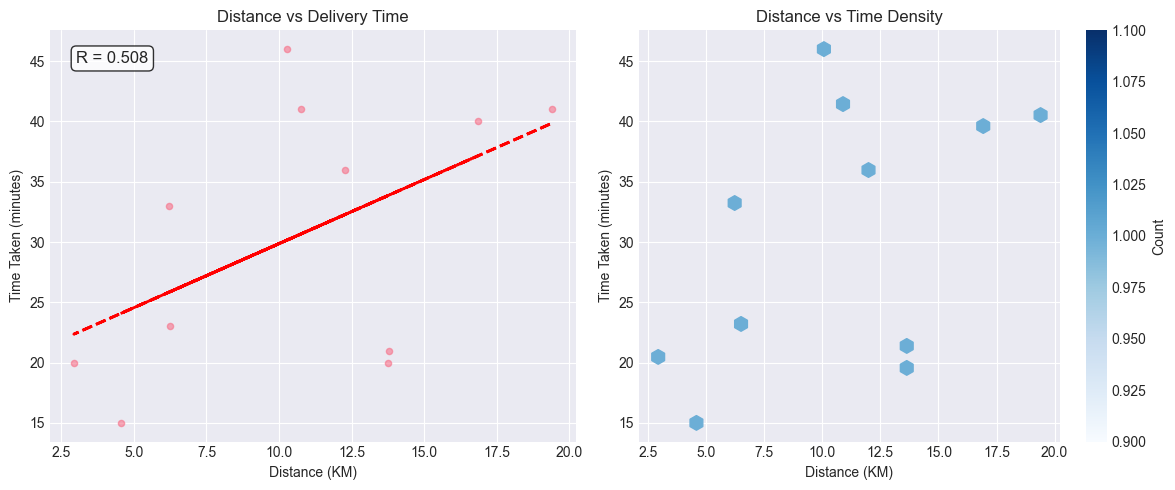

  Average delivery speed: 20.90 km/h
  Mean delivery speed: 21.68 km/h
  Std delivery speed: 10.85 km/h

4. Categorical Feature Analysis
----------------------------------------


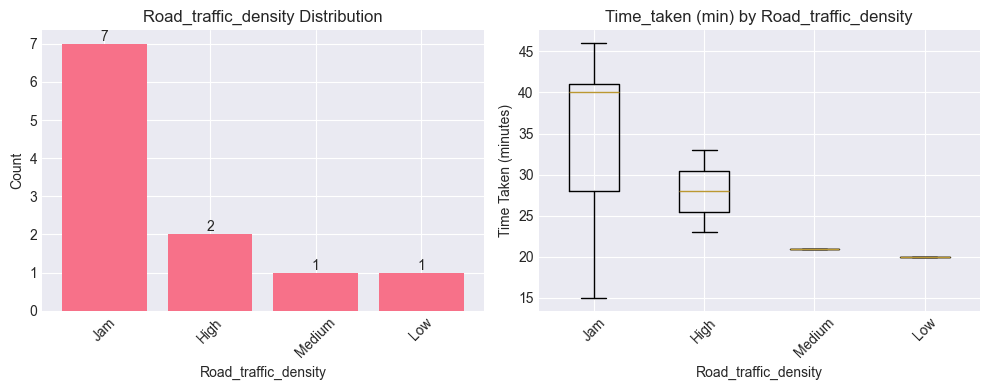


Road_traffic_density:
  Jam: 7 orders, avg time: 34.1 min
  High: 2 orders, avg time: 28.0 min
  Medium: 1 orders, avg time: 21.0 min
  Low: 1 orders, avg time: 20.0 min


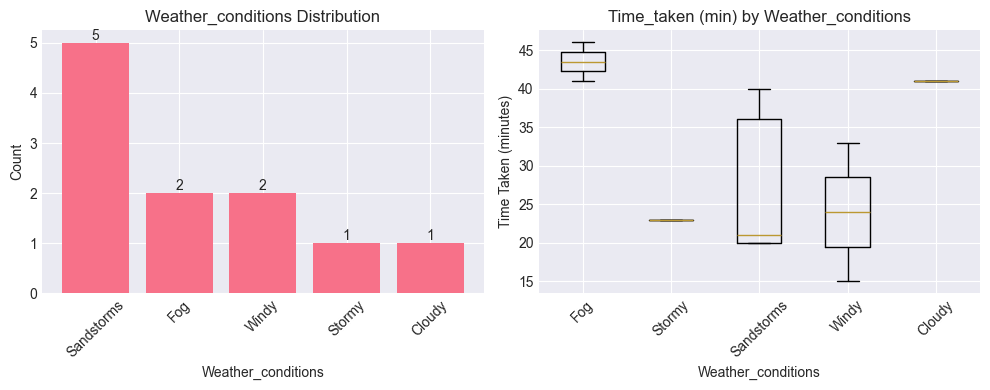


Weather_conditions:
  Fog: 2 orders, avg time: 43.5 min
  Stormy: 1 orders, avg time: 23.0 min
  Sandstorms: 5 orders, avg time: 27.4 min
  Windy: 2 orders, avg time: 24.0 min
  Cloudy: 1 orders, avg time: 41.0 min


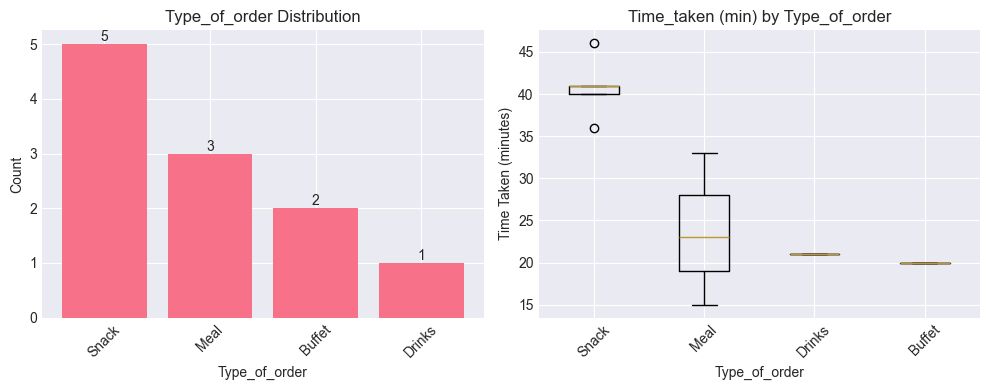


Type_of_order:
  Snack: 5 orders, avg time: 40.8 min
  Meal: 3 orders, avg time: 23.7 min
  Drinks: 1 orders, avg time: 21.0 min
  Buffet: 2 orders, avg time: 20.0 min


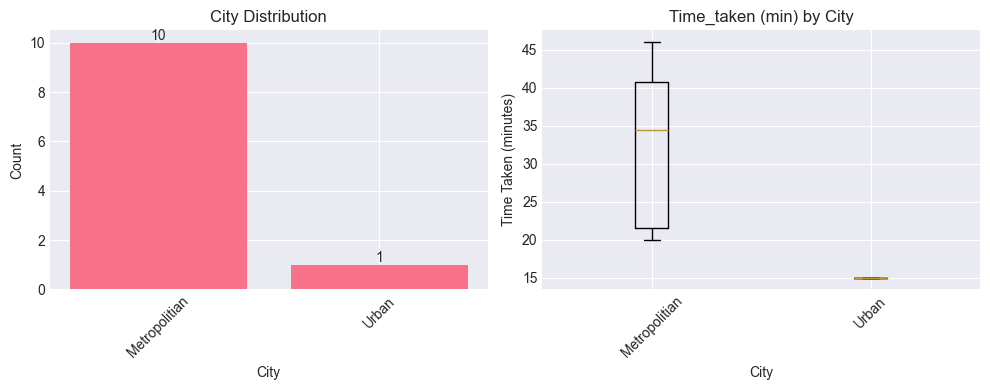


City:
  Metropolitian: 10 orders, avg time: 32.1 min
  Urban: 1 orders, avg time: 15.0 min

5. Temporal Analysis
----------------------------------------


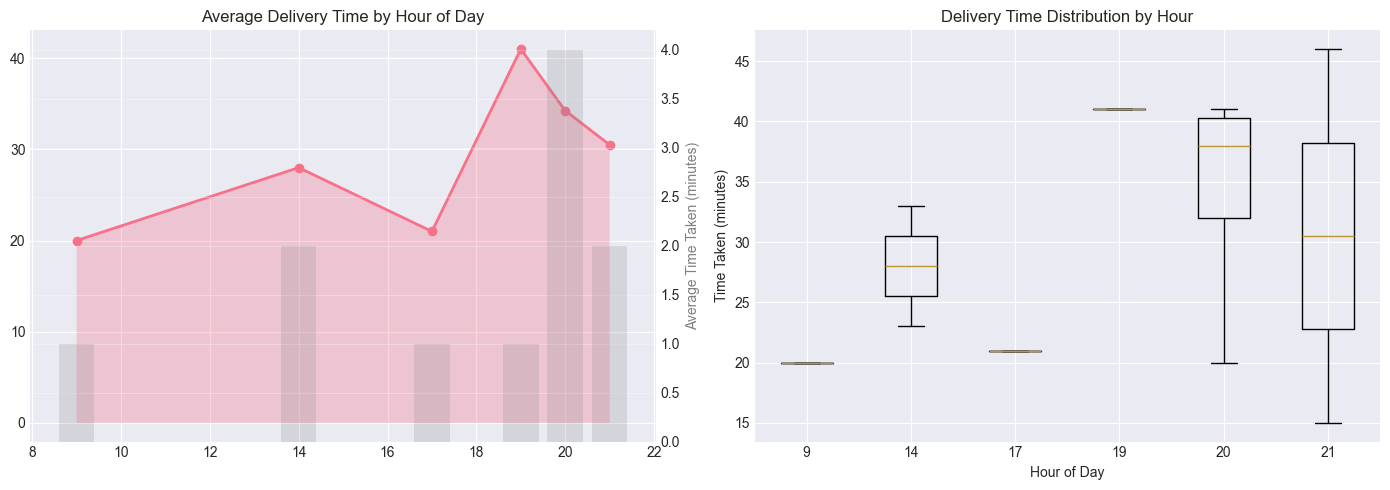

  Peak delivery time: Hour 19 (41.0 minutes average)
  Lowest delivery time: Hour 9 (20.0 minutes average)

6. Outlier Detection
----------------------------------------
  IQR bounds: [-9.5, 70.5] minutes
  Outliers detected: 0 (0.0%)

7. Feature Importance Preview
----------------------------------------

Top 15 features by correlation importance:
  Travel_Time_Min                     : 0.9571 (+)
  Prep_Efficiency                     : 0.7444 (-)
  Order_Complexity                    : 0.7104 (-)
  Distance_Traffic_Interaction        : 0.6269 (+)
  Efficiency_Distance_Interaction     : 0.5946 (+)
  Multiple_Deliveries_Impact          : 0.5415 (+)
  Order_Minute                        : 0.5326 (+)
  Lat_Diff                            : 0.5176 (+)
  Lat_Diff_KM                         : 0.5176 (+)
  Lon_Diff                            : 0.5176 (+)
  Distance_KM                         : 0.5080 (+)
  Expected_Time_Min                   : 0.5080 (+)
  Manhattan_Distance_KM              

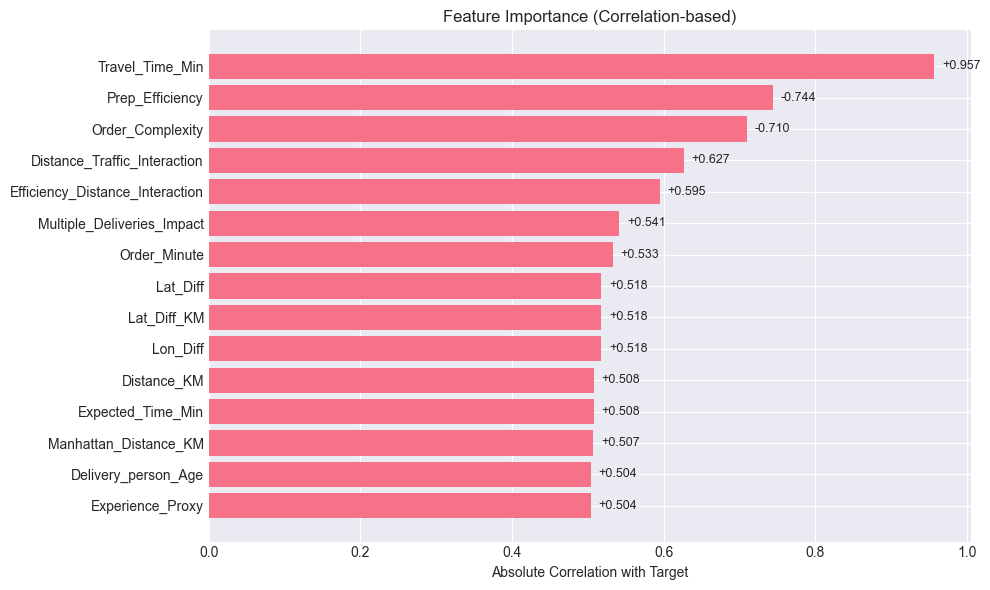


STEP 3: FEATURE TRANSFORMATION & SELECTION

1. Handling Outliers
----------------------------------------
  Capped 0 outliers in target variable (0.0%)
  New target range: [15.0, 46.0]

2. Transforming Skewed Features
----------------------------------------
  Found 11 features with |skew| > 0.75
  Applied log transformation to Restaurant_longitude (skew: 1.84)
  Applied log transformation to Delivery_location_longitude (skew: 1.84)
  Applied log transformation to Order_Hour (skew: -1.39)
  Applied log transformation to Order_Day (skew: -0.76)
  Applied log transformation to Delivery_Speed_KPH (skew: 0.88)
  Applied log transformation to Travel_Speed_KPH (skew: 3.31)
  Applied log transformation to Time_Efficiency_Ratio (skew: 3.31)
  Applied log transformation to Prep_Efficiency (skew: 1.65)
  Applied sqrt transformation to Weekend_Distance_Effect (skew: 0.91)
  Applied sqrt transformation to Order_Hour_Sin (skew: 2.67)

3. Scaling Numerical Features
---------------------------------

In [1]:
# ============================================================================
# ZOMATO DELIVERY TIME PREDICTION - PHASE 2: FEATURE ENGINEERING & EDA
# ============================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# ============================================================================
# LOAD PREPARED DATA FROM PHASE 1
# ============================================================================

def load_prepared_data(file_path='zomato_delivery_prepared.csv'):
    """Load the data prepared in Phase 1"""
    print("Loading prepared data from Phase 1...")
    df = pd.read_csv(file_path)
    print(f"Dataset shape: {df.shape}")
    print(f"Columns: {list(df.columns)[:15]}...")  # Show first 15 columns
    return df

# ============================================================================
# STEP 1: CREATE ADVANCED FEATURES
# ============================================================================

def create_advanced_features(df):
    """
    Create advanced engineered features for better model performance
    """
    print("\n" + "="*80)
    print("STEP 1: CREATING ADVANCED FEATURES")
    print("="*80)
    
    df_advanced = df.copy()
    
    # ------------------------------------------------------------------------
    # 1.1: Speed and Efficiency Features
    # ------------------------------------------------------------------------
    print("\nCreating speed and efficiency features...")
    
    # Average speed (km/h) - excluding preparation time
    df_advanced['Delivery_Speed_KPH'] = df_advanced['Distance_KM'] / (df_advanced['Time_taken (min)'] / 60)
    
    # Travel speed (km/h) - time minus preparation
    df_advanced['Travel_Time_Min'] = df_advanced['Time_taken (min)'] - df_advanced['Preparation_Time_Min']
    df_advanced['Travel_Time_Min'] = df_advanced['Travel_Time_Min'].clip(lower=0.1)  # Avoid division by zero
    df_advanced['Travel_Speed_KPH'] = df_advanced['Distance_KM'] / (df_advanced['Travel_Time_Min'] / 60)
    
    # Efficiency ratio: Actual time vs expected time (assuming 20 kph average)
    df_advanced['Expected_Time_Min'] = (df_advanced['Distance_KM'] / 20) * 60  # 20 kph average speed
    df_advanced['Time_Efficiency_Ratio'] = df_advanced['Expected_Time_Min'] / df_advanced['Travel_Time_Min']
    
    # Preparation efficiency
    df_advanced['Prep_Efficiency'] = df_advanced['Preparation_Time_Min'] / df_advanced['Time_taken (min)']
    
    # ------------------------------------------------------------------------
    # 1.2: Interaction Features
    # ------------------------------------------------------------------------
    print("Creating interaction features...")
    
    # Distance-Traffic interaction
    df_advanced['Distance_Traffic_Interaction'] = df_advanced['Distance_KM'] * df_advanced['Road_traffic_density_Encoded']
    
    # Distance-Weather interaction
    if 'Bad_Weather' in df_advanced.columns:
        df_advanced['Distance_Weather_Interaction'] = df_advanced['Distance_KM'] * df_advanced['Bad_Weather']
    
    # Rush hour distance penalty
    df_advanced['Rush_Hour_Distance_Penalty'] = df_advanced['Distance_KM'] * df_advanced['Is_Rush_Hour']
    
    # Weekend distance effect
    df_advanced['Weekend_Distance_Effect'] = df_advanced['Distance_KM'] * df_advanced['Is_Weekend']
    
    # ------------------------------------------------------------------------
    # 1.3: Temporal Advanced Features
    # ------------------------------------------------------------------------
    print("Creating temporal advanced features...")
    
    # Sin/Cos encoding for hour (captures cyclical nature)
    df_advanced['Order_Hour_Sin'] = np.sin(2 * np.pi * df_advanced['Order_Hour'] / 24)
    df_advanced['Order_Hour_Cos'] = np.cos(2 * np.pi * df_advanced['Order_Hour'] / 24)
    
    # Sin/Cos encoding for day of week
    df_advanced['DayOfWeek_Sin'] = np.sin(2 * np.pi * df_advanced['Order_DayOfWeek'] / 7)
    df_advanced['DayOfWeek_Cos'] = np.cos(2 * np.pi * df_advanced['Order_DayOfWeek'] / 7)
    
    # Time of day categories with more granularity
    df_advanced['Time_Category'] = pd.cut(
        df_advanced['Order_Hour'],
        bins=[0, 5, 9, 12, 15, 18, 21, 24],
        labels=['Late_Night', 'Morning_Rush', 'Late_Morning', 'Afternoon', 
                'Evening_Rush', 'Night', 'Late_Night2'],
        include_lowest=True
    )
    
    # Business hours flag
    df_advanced['Is_Business_Hours'] = df_advanced['Order_Hour'].between(9, 17).astype(int)
    
    # ------------------------------------------------------------------------
    # 1.4: Spatial Features
    # ------------------------------------------------------------------------
    print("Creating spatial features...")
    
    # City zone approximation (using first digit of latitude/longitude)
    df_advanced['Restaurant_Zone'] = (df_advanced['Restaurant_latitude'] * 10).astype(int)
    df_advanced['Delivery_Zone'] = (df_advanced['Delivery_location_latitude'] * 10).astype(int)
    
    # Same zone flag
    df_advanced['Same_Zone'] = (df_advanced['Restaurant_Zone'] == df_advanced['Delivery_Zone']).astype(int)
    
    # Direction vector components
    df_advanced['Lat_Diff'] = df_advanced['Delivery_location_latitude'] - df_advanced['Restaurant_latitude']
    df_advanced['Lon_Diff'] = df_advanced['Delivery_location_longitude'] - df_advanced['Restaurant_longitude']
    
    # ------------------------------------------------------------------------
    # 1.5: Driver Performance Features
    # ------------------------------------------------------------------------
    print("Creating driver performance features...")
    
    # Driver age categories
    df_advanced['Driver_Age_Category'] = pd.cut(
        df_advanced['Delivery_person_Age'],
        bins=[15, 25, 35, 45, 100],
        labels=['Young', 'Adult', 'Middle_Aged', 'Senior']
    )
    
    # Rating categories
    df_advanced['Rating_Category'] = pd.cut(
        df_advanced['Delivery_person_Ratings'],
        bins=[0, 3, 4, 4.5, 5],
        labels=['Poor', 'Average', 'Good', 'Excellent']
    )
    
    # Experience proxy (assuming age correlates with experience)
    df_advanced['Experience_Proxy'] = df_advanced['Delivery_person_Age'] - 18
    df_advanced['Experience_Proxy'] = df_advanced['Experience_Proxy'].clip(lower=0)
    
    # ------------------------------------------------------------------------
    # 1.6: Order Complexity Features
    # ------------------------------------------------------------------------
    print("Creating order complexity features...")
    
    # Multiple deliveries impact
    df_advanced['Multiple_Deliveries_Impact'] = df_advanced['multiple_deliveries'] * df_advanced['Distance_KM']
    
    # Order type complexity score
    order_type_complexity = {
        'Snack': 1,
        'Drinks': 1,
        'Meal': 2,
        'Buffet': 3
    }
    
    if 'Type_of_order' in df_advanced.columns:
        df_advanced['Order_Complexity'] = df_advanced['Type_of_order'].map(order_type_complexity)
        df_advanced['Complexity_Distance_Interaction'] = df_advanced['Order_Complexity'] * df_advanced['Distance_KM']
    
    # Vehicle efficiency score
    vehicle_efficiency = {
        'motorcycle': 1.0,
        'scooter': 0.9,
        'electric_scooter': 0.8,
        'bicycle': 0.7
    }
    
    if 'Type_of_vehicle' in df_advanced.columns:
        df_advanced['Vehicle_Efficiency'] = df_advanced['Type_of_vehicle'].map(vehicle_efficiency)
        df_advanced['Efficiency_Distance_Interaction'] = df_advanced['Vehicle_Efficiency'] * df_advanced['Distance_KM']
    
    # ------------------------------------------------------------------------
    # 1.7: Summary Statistics
    # ------------------------------------------------------------------------
    print(f"\nCreated {len(df_advanced.columns) - len(df.columns)} new advanced features")
    print(f"Total features now: {len(df_advanced.columns)}")
    
    # Show new feature correlations with target
    if 'Time_taken (min)' in df_advanced.columns:
        new_features = [col for col in df_advanced.columns if col not in df.columns]
        print("\nTop 10 new features by correlation with target:")
        
        correlations = {}
        for feature in new_features:
            if pd.api.types.is_numeric_dtype(df_advanced[feature]):
                corr = df_advanced[feature].corr(df_advanced['Time_taken (min)'])
                correlations[feature] = corr
        
        sorted_corr = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
        
        for feature, corr in sorted_corr[:10]:
            print(f"  {feature:35} : {corr:+.4f}")
    
    return df_advanced

# ============================================================================
# STEP 2: EXPLORATORY DATA ANALYSIS (EDA)
# ============================================================================

def perform_eda(df, target_col='Time_taken (min)'):
    """
    Perform comprehensive exploratory data analysis
    """
    print("\n" + "="*80)
    print("STEP 2: EXPLORATORY DATA ANALYSIS")
    print("="*80)
    
    # Create EDA directory for saving plots
    import os
    os.makedirs('eda_plots', exist_ok=True)
    
    # ------------------------------------------------------------------------
    # 2.1: Target Variable Analysis
    # ------------------------------------------------------------------------
    print("\n1. Target Variable Analysis")
    print("-" * 40)
    
    plt.figure(figsize=(15, 5))
    
    # Distribution
    plt.subplot(1, 3, 1)
    plt.hist(df[target_col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Distribution of {target_col}')
    plt.xlabel('Time Taken (minutes)')
    plt.ylabel('Frequency')
    
    # Box plot
    plt.subplot(1, 3, 2)
    plt.boxplot(df[target_col])
    plt.title(f'Box Plot of {target_col}')
    plt.ylabel('Time Taken (minutes)')
    
    # Q-Q plot
    plt.subplot(1, 3, 3)
    stats.probplot(df[target_col], dist="norm", plot=plt)
    plt.title('Q-Q Plot')
    
    plt.tight_layout()
    plt.savefig('eda_plots/target_distribution.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    # Target statistics
    print(f"\nTarget Variable Statistics:")
    print(f"  Mean: {df[target_col].mean():.2f} minutes")
    print(f"  Median: {df[target_col].median():.2f} minutes")
    print(f"  Std Dev: {df[target_col].std():.2f} minutes")
    print(f"  Min: {df[target_col].min():.2f} minutes")
    print(f"  Max: {df[target_col].max():.2f} minutes")
    print(f"  Skewness: {df[target_col].skew():.3f}")
    print(f"  Kurtosis: {df[target_col].kurtosis():.3f}")
    
    # ------------------------------------------------------------------------
    # 2.2: Correlation Analysis
    # ------------------------------------------------------------------------
    print("\n2. Correlation Analysis")
    print("-" * 40)
    
    # Select numeric columns for correlation
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    
    # Keep only columns with reasonable variance
    numeric_cols = [col for col in numeric_cols if df[col].nunique() > 1]
    
    # Limit to top 20 most important features for readability
    corr_with_target = {}
    for col in numeric_cols:
        if col != target_col:
            corr = df[col].corr(df[target_col])
            corr_with_target[col] = abs(corr)
    
    top_features = sorted(corr_with_target.items(), key=lambda x: x[1], reverse=True)[:20]
    top_feature_names = [feat[0] for feat in top_features]
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    correlation_matrix = df[top_feature_names + [target_col]].corr()
    
    # Create mask for upper triangle
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    
    sns.heatmap(correlation_matrix, 
                mask=mask,
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm',
                center=0,
                square=True,
                cbar_kws={"shrink": 0.8})
    
    plt.title('Top 20 Features Correlation Heatmap', fontsize=14)
    plt.tight_layout()
    plt.savefig('eda_plots/correlation_heatmap.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    # Top correlations with target
    print("\nTop 10 features correlated with target:")
    for feature, corr_abs in top_features[:10]:
        actual_corr = df[feature].corr(df[target_col])
        print(f"  {feature:35} : {actual_corr:+.4f}")
    
    # ------------------------------------------------------------------------
    # 2.3: Distance vs Time Analysis
    # ------------------------------------------------------------------------
    print("\n3. Distance vs Delivery Time Analysis")
    print("-" * 40)
    
    if 'Distance_KM' in df.columns:
        plt.figure(figsize=(12, 5))
        
        # Scatter plot
        plt.subplot(1, 2, 1)
        plt.scatter(df['Distance_KM'], df[target_col], alpha=0.6, s=20)
        
        # Add regression line
        z = np.polyfit(df['Distance_KM'], df[target_col], 1)
        p = np.poly1d(z)
        plt.plot(df['Distance_KM'], p(df['Distance_KM']), "r--", linewidth=2)
        
        plt.xlabel('Distance (KM)')
        plt.ylabel('Time Taken (minutes)')
        plt.title('Distance vs Delivery Time')
        
        # Calculate and display R-squared
        correlation = df['Distance_KM'].corr(df[target_col])
        plt.text(0.05, 0.95, f'R = {correlation:.3f}', 
                transform=plt.gca().transAxes, fontsize=12,
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
        
        # Hexbin plot for density
        plt.subplot(1, 2, 2)
        hb = plt.hexbin(df['Distance_KM'], df[target_col], 
                        gridsize=30, cmap='Blues', mincnt=1)
        plt.xlabel('Distance (KM)')
        plt.ylabel('Time Taken (minutes)')
        plt.title('Distance vs Time Density')
        plt.colorbar(hb, label='Count')
        
        plt.tight_layout()
        plt.savefig('eda_plots/distance_vs_time.png', dpi=100, bbox_inches='tight')
        plt.show()
        
        # Average speed calculation
        print(f"  Average delivery speed: {df['Distance_KM'].sum() / (df[target_col].sum() / 60):.2f} km/h")
        if 'Delivery_Speed_KPH' in df.columns:
            print(f"  Mean delivery speed: {df['Delivery_Speed_KPH'].mean():.2f} km/h")
            print(f"  Std delivery speed: {df['Delivery_Speed_KPH'].std():.2f} km/h")
    
    # ------------------------------------------------------------------------
    # 2.4: Categorical Feature Analysis
    # ------------------------------------------------------------------------
    print("\n4. Categorical Feature Analysis")
    print("-" * 40)
    
    # List of categorical columns to analyze
    categorical_cols = []
    if 'Road_traffic_density' in df.columns:
        categorical_cols.append('Road_traffic_density')
    if 'Weather_conditions' in df.columns:
        categorical_cols.append('Weather_conditions')
    if 'Type_of_order' in df.columns:
        categorical_cols.append('Type_of_order')
    if 'City' in df.columns:
        categorical_cols.append('City')
    if 'Time_Category' in df.columns:
        categorical_cols.append('Time_Category')
    
    # Plot categorical distributions
    for i, cat_col in enumerate(categorical_cols[:4]):  # Limit to first 4
        if cat_col in df.columns:
            plt.figure(figsize=(10, 4))
            
            # Count plot
            plt.subplot(1, 2, 1)
            value_counts = df[cat_col].value_counts()
            bars = plt.bar(value_counts.index.astype(str), value_counts.values)
            plt.title(f'{cat_col} Distribution')
            plt.xlabel(cat_col)
            plt.ylabel('Count')
            plt.xticks(rotation=45)
            
            # Add count labels on bars
            for bar in bars:
                height = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2., height,
                        f'{int(height)}', ha='center', va='bottom')
            
            # Box plot by category
            plt.subplot(1, 2, 2)
            plot_data = []
            labels = []
            for category in df[cat_col].dropna().unique():
                category_data = df[df[cat_col] == category][target_col]
                if len(category_data) > 0:
                    plot_data.append(category_data)
                    labels.append(str(category))
            
            if plot_data:
                plt.boxplot(plot_data, labels=labels)
                plt.title(f'{target_col} by {cat_col}')
                plt.xlabel(cat_col)
                plt.ylabel('Time Taken (minutes)')
                plt.xticks(rotation=45)
            
            plt.tight_layout()
            plt.savefig(f'eda_plots/categorical_{cat_col}.png', dpi=100, bbox_inches='tight')
            plt.show()
            
            # Print statistics
            if df[cat_col].nunique() < 10:  # Only for reasonable number of categories
                print(f"\n{cat_col}:")
                for category in df[cat_col].dropna().unique():
                    category_mean = df[df[cat_col] == category][target_col].mean()
                    category_count = (df[cat_col] == category).sum()
                    print(f"  {category}: {category_count} orders, avg time: {category_mean:.1f} min")
    
    # ------------------------------------------------------------------------
    # 2.5: Temporal Analysis
    # ------------------------------------------------------------------------
    print("\n5. Temporal Analysis")
    print("-" * 40)
    
    if 'Order_Hour' in df.columns:
        plt.figure(figsize=(14, 5))
        
        # Line plot of average time by hour
        plt.subplot(1, 2, 1)
        hourly_avg = df.groupby('Order_Hour')[target_col].mean()
        hourly_count = df.groupby('Order_Hour')[target_col].count()
        
        plt.plot(hourly_avg.index, hourly_avg.values, marker='o', linewidth=2)
        plt.fill_between(hourly_avg.index, 0, hourly_avg.values, alpha=0.3)
        
        # Add count as bars in second y-axis
        ax2 = plt.gca().twinx()
        ax2.bar(hourly_count.index, hourly_count.values, alpha=0.2, color='gray', label='Order Count')
        ax2.set_ylabel('Order Count', color='gray')
        
        plt.xlabel('Hour of Day')
        plt.ylabel('Average Time Taken (minutes)')
        plt.title('Average Delivery Time by Hour of Day')
        plt.grid(True, alpha=0.3)
        
        # Box plot by hour
        plt.subplot(1, 2, 2)
        plot_data = []
        hours = sorted(df['Order_Hour'].unique())
        
        for hour in hours:
            plot_data.append(df[df['Order_Hour'] == hour][target_col])
        
        plt.boxplot(plot_data, labels=hours)
        plt.xlabel('Hour of Day')
        plt.ylabel('Time Taken (minutes)')
        plt.title('Delivery Time Distribution by Hour')
        
        plt.tight_layout()
        plt.savefig('eda_plots/temporal_analysis.png', dpi=100, bbox_inches='tight')
        plt.show()
        
        # Peak hour analysis
        peak_hour = hourly_avg.idxmax()
        peak_time = hourly_avg.max()
        print(f"  Peak delivery time: Hour {peak_hour} ({peak_time:.1f} minutes average)")
        print(f"  Lowest delivery time: Hour {hourly_avg.idxmin()} ({hourly_avg.min():.1f} minutes average)")
    
    # ------------------------------------------------------------------------
    # 2.6: Outlier Detection
    # ------------------------------------------------------------------------
    print("\n6. Outlier Detection")
    print("-" * 40)
    
    # Using IQR method
    Q1 = df[target_col].quantile(0.25)
    Q3 = df[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[target_col] < lower_bound) | (df[target_col] > upper_bound)]
    
    print(f"  IQR bounds: [{lower_bound:.1f}, {upper_bound:.1f}] minutes")
    print(f"  Outliers detected: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    if len(outliers) > 0:
        print("  Sample outliers:")
        print(outliers[[target_col, 'Distance_KM', 'Order_Hour'] + categorical_cols[:2]].head())
    
    # ------------------------------------------------------------------------
    # 2.7: Feature Importance Preview (using simple methods)
    # ------------------------------------------------------------------------
    print("\n7. Feature Importance Preview")
    print("-" * 40)
    
    # Simple feature importance using correlation
    feature_importance = {}
    for col in numeric_cols:
        if col != target_col:
            # Use absolute correlation as importance score
            importance = abs(df[col].corr(df[target_col]))
            if not pd.isna(importance):
                feature_importance[col] = importance
    
    # Sort and display top features
    sorted_importance = sorted(feature_importance.items(), key=lambda x: x[1], reverse=True)[:15]
    
    print("\nTop 15 features by correlation importance:")
    for feature, importance in sorted_importance:
        actual_corr = df[feature].corr(df[target_col])
        direction = "+" if actual_corr > 0 else "-"
        print(f"  {feature:35} : {importance:.4f} ({direction})")
    
    # Plot feature importance
    plt.figure(figsize=(10, 6))
    features = [feat[0] for feat in sorted_importance]
    importances = [feat[1] for feat in sorted_importance]
    
    bars = plt.barh(features[::-1], importances[::-1])
    plt.xlabel('Absolute Correlation with Target')
    plt.title('Feature Importance (Correlation-based)')
    
    # Add correlation values on bars
    for i, (bar, feat) in enumerate(zip(bars, features[::-1])):
        actual_corr = df[feat].corr(df[target_col])
        plt.text(bar.get_width() + 0.01, bar.get_y() + bar.get_height()/2,
                f'{actual_corr:+.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('eda_plots/feature_importance.png', dpi=100, bbox_inches='tight')
    plt.show()
    
    return sorted_importance

# ============================================================================
# STEP 3: DATA TRANSFORMATION & FEATURE SELECTION
# ============================================================================

def transform_and_select_features(df, target_col='Time_taken (min)', top_n_features=30):
    """
    Transform features and select most important ones for modeling
    """
    print("\n" + "="*80)
    print("STEP 3: FEATURE TRANSFORMATION & SELECTION")
    print("="*80)
    
    df_transformed = df.copy()
    
    # ------------------------------------------------------------------------
    # 3.1: Handle Outliers in Target Variable
    # ------------------------------------------------------------------------
    print("\n1. Handling Outliers")
    print("-" * 40)
    
    # Calculate IQR bounds
    Q1 = df_transformed[target_col].quantile(0.25)
    Q3 = df_transformed[target_col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap outliers instead of removing (to preserve data)
    original_shape = df_transformed.shape[0]
    df_transformed[target_col] = df_transformed[target_col].clip(lower_bound, upper_bound)
    
    outliers_capped = ((df[target_col] < lower_bound) | (df[target_col] > upper_bound)).sum()
    print(f"  Capped {outliers_capped} outliers in target variable ({outliers_capped/original_shape*100:.1f}%)")
    print(f"  New target range: [{df_transformed[target_col].min():.1f}, {df_transformed[target_col].max():.1f}]")
    
    # ------------------------------------------------------------------------
    # 3.2: Transform Skewed Features
    # ------------------------------------------------------------------------
    print("\n2. Transforming Skewed Features")
    print("-" * 40)
    
    # Identify numeric features with high skewness
    numeric_cols = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
    numeric_cols = [col for col in numeric_cols if col != target_col]
    
    skewness_threshold = 0.75  # Absolute skewness threshold
    skewed_features = []
    
    for col in numeric_cols:
        if df_transformed[col].nunique() > 5:  # Only for continuous variables
            skew = df_transformed[col].skew()
            if abs(skew) > skewness_threshold:
                skewed_features.append((col, skew))
    
    print(f"  Found {len(skewed_features)} features with |skew| > {skewness_threshold}")
    
    # Apply log transformation to highly skewed features
    for col, skew in skewed_features[:10]:  # Limit to top 10
        if df_transformed[col].min() > 0:  # Log only works for positive values
            df_transformed[f'{col}_log'] = np.log1p(df_transformed[col])
            print(f"  Applied log transformation to {col} (skew: {skew:.2f})")
        else:
            # Use yeo-johnson or box-cox if negative values exist
            df_transformed[f'{col}_sqrt'] = np.sqrt(df_transformed[col] - df_transformed[col].min() + 1)
            print(f"  Applied sqrt transformation to {col} (skew: {skew:.2f})")
    
    # ------------------------------------------------------------------------
    # 3.3: Scale Numerical Features
    # ------------------------------------------------------------------------
    print("\n3. Scaling Numerical Features")
    print("-" * 40)
    
    # Identify columns to scale (excluding binary/encoded columns)
    cols_to_scale = []
    for col in numeric_cols:
        # Don't scale binary columns, ID-like columns, or already normalized columns
        if (df_transformed[col].nunique() > 2 and 
            not any(x in col.lower() for x in ['id', 'encoded', 'flag', 'is_', 'sin', 'cos']) and
            abs(df_transformed[col].std()) > 0.01):  # Avoid scaling constant columns
            cols_to_scale.append(col)
    
    print(f"  Scaling {len(cols_to_scale)} numerical features")
    
    # Apply standardization
    scaler = StandardScaler()
    scaled_features = scaler.fit_transform(df_transformed[cols_to_scale])
    df_scaled = pd.DataFrame(scaled_features, columns=[f'{col}_scaled' for col in cols_to_scale])
    
    # Add scaled features to dataframe
    df_transformed = pd.concat([df_transformed.reset_index(drop=True), 
                               df_scaled.reset_index(drop=True)], axis=1)
    
    # ------------------------------------------------------------------------
    # 3.4: Feature Selection
    # ------------------------------------------------------------------------
    print("\n4. Feature Selection")
    print("-" * 40)
    
    # Get all numeric features (original + transformed + scaled)
    all_numeric_features = df_transformed.select_dtypes(include=[np.number]).columns.tolist()
    all_numeric_features = [col for col in all_numeric_features if col != target_col]
    
    # Calculate feature importance using correlation
    feature_scores = {}
    for col in all_numeric_features:
        # Try to calculate correlation, handle any errors
        try:
            corr = abs(df_transformed[col].corr(df_transformed[target_col]))
            if not pd.isna(corr):
                feature_scores[col] = corr
        except:
            continue
    
    # Sort features by importance
    sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Select top N features
    selected_features = [feat[0] for feat in sorted_features[:top_n_features]]
    selected_scores = [feat[1] for feat in sorted_features[:top_n_features]]
    
    print(f"  Selected top {len(selected_features)} features for modeling")
    print(f"  Feature importance range: [{min(selected_scores):.4f}, {max(selected_scores):.4f}]")
    
    # Display selected features
    print("\n  Top 15 selected features:")
    for i, (feature, score) in enumerate(zip(selected_features[:15], selected_scores[:15])):
        print(f"    {i+1:2}. {feature:35} : {score:.4f}")
    
    # ------------------------------------------------------------------------
    # 3.5: Create Final Modeling Dataset
    # ------------------------------------------------------------------------
    print("\n5. Creating Final Dataset")
    print("-" * 40)
    
    # Create final feature set
    final_features = selected_features + [target_col]
    
    # Ensure all features exist in dataframe
    final_features = [feat for feat in final_features if feat in df_transformed.columns]
    
    df_final = df_transformed[final_features].copy()
    
    # Check for any remaining missing values
    missing_values = df_final.isnull().sum().sum()
    if missing_values > 0:
        print(f"  Warning: {missing_values} missing values remaining")
        # Fill with median for numeric columns
        for col in df_final.columns:
            if df_final[col].dtype in [np.float64, np.float32, np.int64, np.int32]:
                df_final[col] = df_final[col].fillna(df_final[col].median())
    
    print(f"  Final dataset shape: {df_final.shape}")
    print(f"  Features: {len(df_final.columns) - 1}")
    print(f"  Samples: {len(df_final)}")
    
    # ------------------------------------------------------------------------
    # 3.6: Save Final Dataset
    # ------------------------------------------------------------------------
    output_file = 'zomato_delivery_modeling_ready.csv'
    df_final.to_csv(output_file, index=False)
    print(f"\n  Final dataset saved to: {output_file}")
    
    return df_final, selected_features, scaler

# ============================================================================
# MAIN EXECUTION
# ============================================================================

def main():
    """
    Main function to execute Phase 2
    """
    print("ZOMATO DELIVERY PREDICTION - PHASE 2: FEATURE ENGINEERING & EDA")
    print("="*80)
    
    # ------------------------------------------------------------------------
    # Load prepared data from Phase 1
    # ------------------------------------------------------------------------
    try:
        df = load_prepared_data('zomato_delivery_prepared.csv')
    except FileNotFoundError:
        print("Error: Prepared data file not found.")
        print("Please run Phase 1 first or provide the correct file path.")
        return
    
    # ------------------------------------------------------------------------
    # Step 1: Create Advanced Features
    # ------------------------------------------------------------------------
    df_advanced = create_advanced_features(df)
    
    # ------------------------------------------------------------------------
    # Step 2: Perform Exploratory Data Analysis
    # ------------------------------------------------------------------------
    feature_importance = perform_eda(df_advanced)
    
    # ------------------------------------------------------------------------
    # Step 3: Transform and Select Features
    # ------------------------------------------------------------------------
    df_final, selected_features, scaler = transform_and_select_features(
        df_advanced, 
        top_n_features=30
    )
    
    # ------------------------------------------------------------------------
    # Summary Report
    # ------------------------------------------------------------------------
    print("\n" + "="*80)
    print("PHASE 2 COMPLETED SUCCESSFULLY")
    print("="*80)
    
    print("\nSUMMARY:")
    print(f"1. Original features: {len(df.columns)}")
    print(f"2. After advanced engineering: {len(df_advanced.columns)}")
    print(f"3. Final selected features: {len(selected_features)}")
    print(f"4. Total samples: {len(df_final)}")
    
    print("\nNEXT STEPS:")
    print("1. Dataset ready for modeling: 'zomato_delivery_modeling_ready.csv'")
    print("2. EDA plots saved in 'eda_plots/' directory")
    print("3. Proceed to Phase 3: Model Training & Comparison")
    
    return df_final, selected_features, scaler

# ============================================================================
# RUN THE SCRIPT
# ============================================================================

if __name__ == "__main__":
    # Execute Phase 2
    df_final, selected_features, scaler = main()
    
    # Display sample of final data
    print("\n" + "="*80)
    print("SAMPLE OF FINAL DATASET (First 5 rows):")
    print("="*80)
    
    # Show target and top 5 features
    display_cols = selected_features[:5] + ['Time_taken (min)']
    display_cols = [col for col in display_cols if col in df_final.columns]
    
    if display_cols:
        print(df_final[display_cols].head())
    
    print("\nReady for Phase 3: Model Training!")